<a href="https://colab.research.google.com/github/skywalker0803r/CFB/blob/main/%E7%AC%AC%E4%BA%8C%E6%AE%B5%E8%84%AB%E7%A1%AB%E6%95%88%E7%8E%87%E5%96%AE%E7%B4%94%E8%87%AA%E5%9B%9E%E6%AD%B8%E5%AF%A6%E9%A9%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/脫硫劑優化改善/20240916-CFB2脫硫劑優化改善.xlsx')
col = df.columns
df = df.iloc[1:,:]
df.columns = col
df = df.set_index('Unnamed: 0')
df.index.name = 'datetime'
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,MLUT4_AIA792101A,MLUT4_AIA792101B,MLUT4_AIC-232B,MLUT4_AT-232A,MLUT4_AT-237,MLUT4_AT-240,MLUT4_AT-240A,MLUT4_FIC-231A,MLUT4_FIC-231B,MLUT4_FIC-231C,...,MLUT4_TE-252F,MLUT4_TE-252G,MLUT4_TE-252H,MLUT4_TE-252I,MLUT4_ZT-231,MLUT4_ZT-232,DeSOx_1st,DeSOx_2nd,前爐SOx濃度,鈣硫比
datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,5.540932,6.8,67.034424,151.208024,9.623605,8.619934,8.619934,20.605973,0,17.456094,...,876.984866,845.297084,845.703201,876.997523,59.200001,15,0.969941,0.871410,2230.093232,2.223152
2024-01-01 00:05:00,5.533478,6.8,66.662524,150.811453,9.616252,8.147002,8.147002,20.18102,0,17.449118,...,875.326466,846.587071,844.10285,877.38106,59.200001,15,0.969979,0.877787,2220.527929,2.220789
2024-01-01 00:10:00,5.526025,6.8,64.320729,151.708113,9.608899,8.247992,8.247992,20.200619,0,17.442142,...,875.675699,845.374599,843.500123,877.8976,59.200001,15,0.971249,0.871768,2237.129686,2.217612
2024-01-01 00:15:00,5.518571,6.801543,64.840762,151.283528,9.600898,7.60582,7.60582,20.220218,0,17.571883,...,875.435828,845.10045,842.910508,874.888616,59.200001,15,0.970896,0.882700,2227.895501,2.214444
2024-01-01 00:20:00,5.511117,6.819977,64.390831,150.994896,9.581994,6.110485,6.110485,20.549012,0,17.339679,...,875.2454,846.058978,844.200021,878.41671,59.200001,15,0.970878,0.905103,2211.052236,2.211285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-15 23:35:00,6.258452,5.140339,114.166438,209.520746,9.360355,13.105704,13.105704,12.795748,11.854892,12.8422,...,916.635699,889.885541,906.016252,870.865216,100,26.103367,0.945172,0.885205,2082.274527,3.928554
2024-09-15 23:40:00,6.284992,5.166336,106.669841,208.177318,9.280099,9.903673,9.903673,12.797045,11.862273,12.823741,...,914.06561,889.042164,904.255862,869.007829,100,26.093265,0.948517,0.907156,2071.948976,3.927730
2024-09-15 23:45:00,6.232171,5.225976,104.663595,211.564232,9.359701,9.345572,9.345572,12.798342,11.880556,12.842696,...,913.978871,890.439554,903.442876,867.71297,100,26.1,0.949882,0.910708,2088.339754,3.928170


In [94]:
def series_to_supervised(data, n_in=1, dropnan=True):
    n_vars = data.columns
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f"{j}(t-{i})" for j in n_vars]
    cols.append(df)
    names += [f'{j}(t)' for j in n_vars]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

data = series_to_supervised(df,n_in=1)[['DeSOx_2nd(t-1)','DeSOx_2nd(t)']]
data

,DeSOx_2nd(t-1),DeSOx_2nd(t)
datetime,,
2024-08-23 14:05:00,0.495545,0.522061
2024-08-23 14:10:00,0.522061,0.519661
2024-08-23 14:15:00,0.519661,0.515866
2024-08-23 14:20:00,0.515866,0.541711
2024-08-23 14:25:00,0.541711,0.551271
...,...,...
2024-09-15 23:35:00,0.881519,0.885205
2024-09-15 23:40:00,0.885205,0.907156
2024-09-15 23:45:00,0.907156,0.910708


In [95]:
data.describe()

,DeSOx_2nd(t-1),DeSOx_2nd(t)
count,6743.000000,6743.000000
mean,0.875801,0.875864
std,0.093942,0.093830
min,-1.734115,-1.734115
25%,0.857126,0.857162
50%,0.897804,0.897810
75%,0.922308,0.922308
max,0.995194,0.995194


<Axes: xlabel='datetime'>

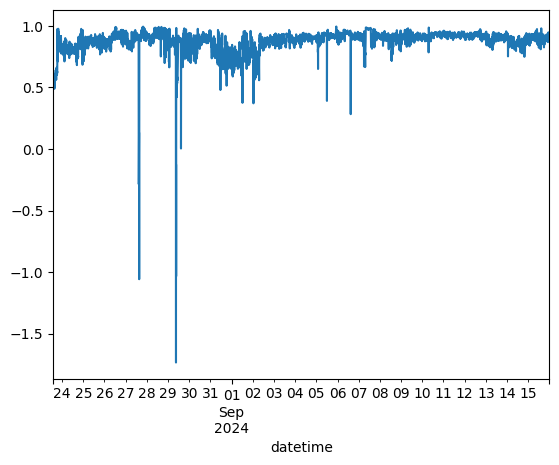

In [96]:
data['DeSOx_2nd(t)'].plot()

<Axes: xlabel='datetime'>

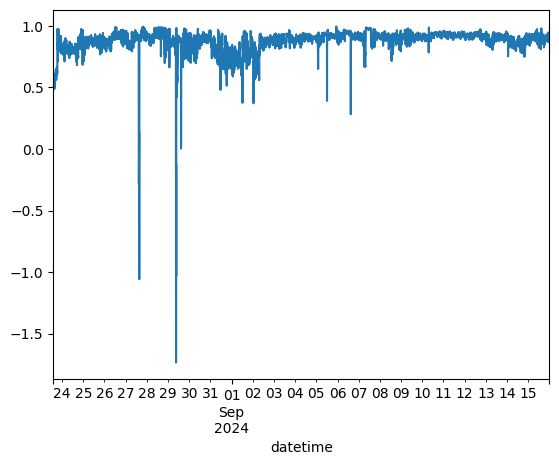

In [97]:
data['DeSOx_2nd(t-1)'].plot()

In [98]:
cond1 = data['DeSOx_2nd(t-1)'] > 0
cond2 = data['DeSOx_2nd(t)'] > 0
cond3 = data['DeSOx_2nd(t-1)'] < 1
cond4 = data['DeSOx_2nd(t)'] < 1
data = data[cond1&cond2&cond3&cond4]

<Axes: xlabel='datetime'>

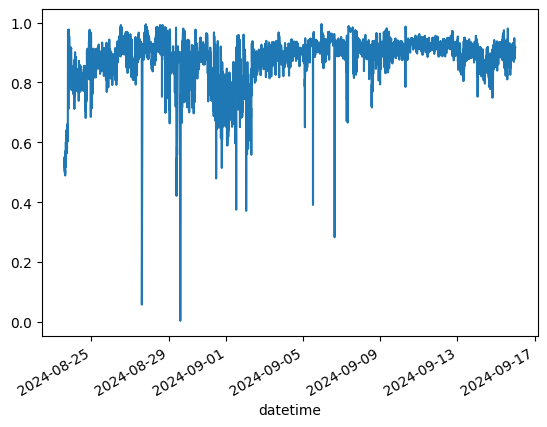

In [99]:
data['DeSOx_2nd(t)'].plot()

<Axes: xlabel='datetime'>

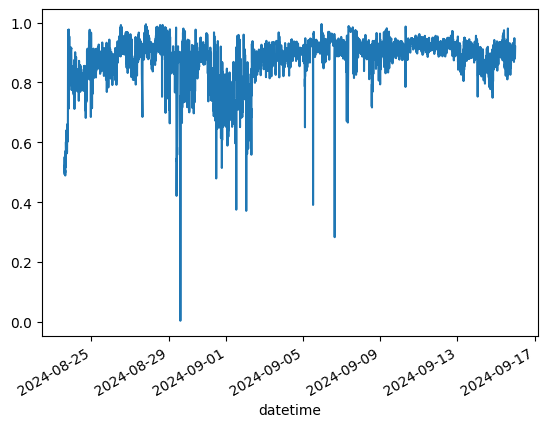

In [100]:
data['DeSOx_2nd(t-1)'].plot()

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['DeSOx_2nd(t-1)','DeSOx_2nd(t)']] = scaler.fit_transform(data[['DeSOx_2nd(t-1)','DeSOx_2nd(t)']])
data

,DeSOx_2nd(t-1),DeSOx_2nd(t)
datetime,,
2024-08-23 14:05:00,0.495788,0.522546
2024-08-23 14:10:00,0.522546,0.520124
2024-08-23 14:15:00,0.520124,0.516294
2024-08-23 14:20:00,0.516294,0.542375
2024-08-23 14:25:00,0.542375,0.552023
...,...,...
2024-09-15 23:35:00,0.885287,0.889007
2024-09-15 23:40:00,0.889007,0.911158
2024-09-15 23:45:00,0.911158,0.914743


測試集 MSE: 0.0010886349725053497
測試集 R^2 分數: 0.788906946917987
模型斜率 coef_: [0.86120525]
模型截距 intercept_: 0.12225740708122879


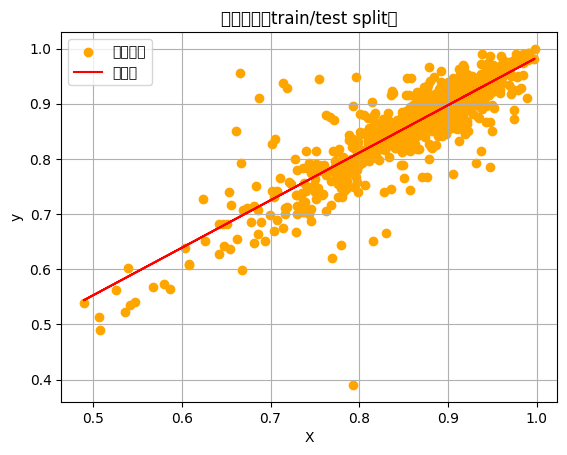

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 產生樣本資料
X = data[['DeSOx_2nd(t-1)']]
y = data['DeSOx_2nd(t)']

# 切分訓練與測試資料（80% 訓練, 20% 測試）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立並訓練模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測測試集
y_pred = model.predict(X_test)

# 模型評估
print("測試集 MSE:", mean_squared_error(y_test, y_pred))
print("測試集 R^2 分數:", r2_score(y_test, y_pred))
print("模型斜率 coef_:", model.coef_)
print("模型截距 intercept_:", model.intercept_)

# 畫圖顯示訓練資料、測試資料與預測線
#plt.scatter(X_train, y_train, color='blue', label='訓練資料')
plt.scatter(X_test, y_test, color='orange', label='測試資料')
plt.plot(X_test, model.predict(X_test), color='red', label='預測線')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('線性回歸（train/test split）')
plt.grid(True)
plt.show()


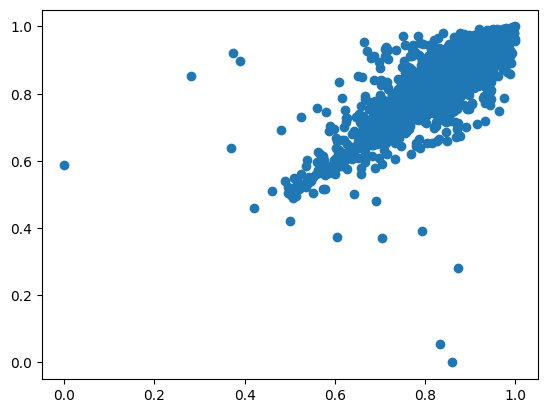

In [103]:
plt.scatter(data['DeSOx_2nd(t-1)'],data['DeSOx_2nd(t)'])

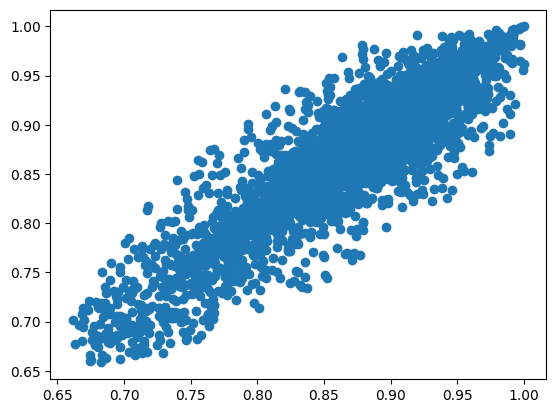

In [104]:
import pandas as pd
import numpy as np
from scipy.stats import chi2

# 假設你的df長這樣
# df = pd.DataFrame({'x1': [...], 'x2': [...]})

# Step 1: 計算平均和協方差
df = data
mean_vec = df.mean().values
cov_matrix = np.cov(df.values, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Step 2: 計算每筆資料的馬氏距離
def mahalanobis(x, mean, inv_cov):
    diff = x - mean
    return np.sqrt(diff.T @ inv_cov @ diff)

# 計算所有樣本的距離
distances = df.apply(lambda row: mahalanobis(row.values, mean_vec, inv_cov_matrix), axis=1)

# Step 3: 決定閾值，例如卡方分布下95%置信區間的臨界值（自由度=2因為是兩欄）
threshold = np.sqrt(chi2.ppf(0.99, df=2))

# Step 4: 過濾掉離群樣本
df_clean = df[distances < threshold]

# 如果你想看哪些是離群值
outliers = df[distances >= threshold]
plt.scatter(df_clean['DeSOx_2nd(t-1)'],df_clean['DeSOx_2nd(t)'])

測試集 MSE: 0.0005339835002601249
測試集 R^2 分數: 0.8338976612841045
模型斜率 coef_: [0.91627114]
模型截距 intercept_: 0.07419390393481207


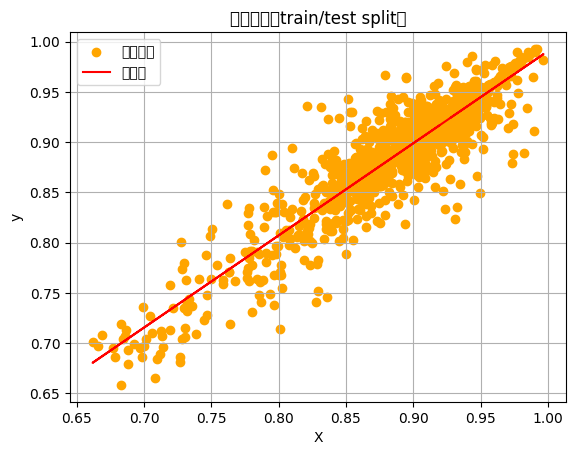

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 產生樣本資料
X = df_clean[['DeSOx_2nd(t-1)']]
y = df_clean['DeSOx_2nd(t)']

# 切分訓練與測試資料（80% 訓練, 20% 測試）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立並訓練模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測測試集
y_pred = model.predict(X_test)

# 模型評估
print("測試集 MSE:", mean_squared_error(y_test, y_pred))
print("測試集 R^2 分數:", r2_score(y_test, y_pred))
print("模型斜率 coef_:", model.coef_)
print("模型截距 intercept_:", model.intercept_)

# 畫圖顯示訓練資料、測試資料與預測線
#plt.scatter(X_train, y_train, color='blue', label='訓練資料')
plt.scatter(X_test, y_test, color='orange', label='測試資料')
plt.plot(X_test, model.predict(X_test), color='red', label='預測線')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('線性回歸（train/test split）')
plt.grid(True)
plt.show()
